# Regular Genomics Project **RNA Localisation**


In [1]:
from plotting import plot_line_graph, multiplot_pearson
from metrics import Pearson
from models import CNN
from utils import prepare_data, set_variables
import matplotlib.pyplot as plt

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [2]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [15]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'flor_CNN_Att14'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)

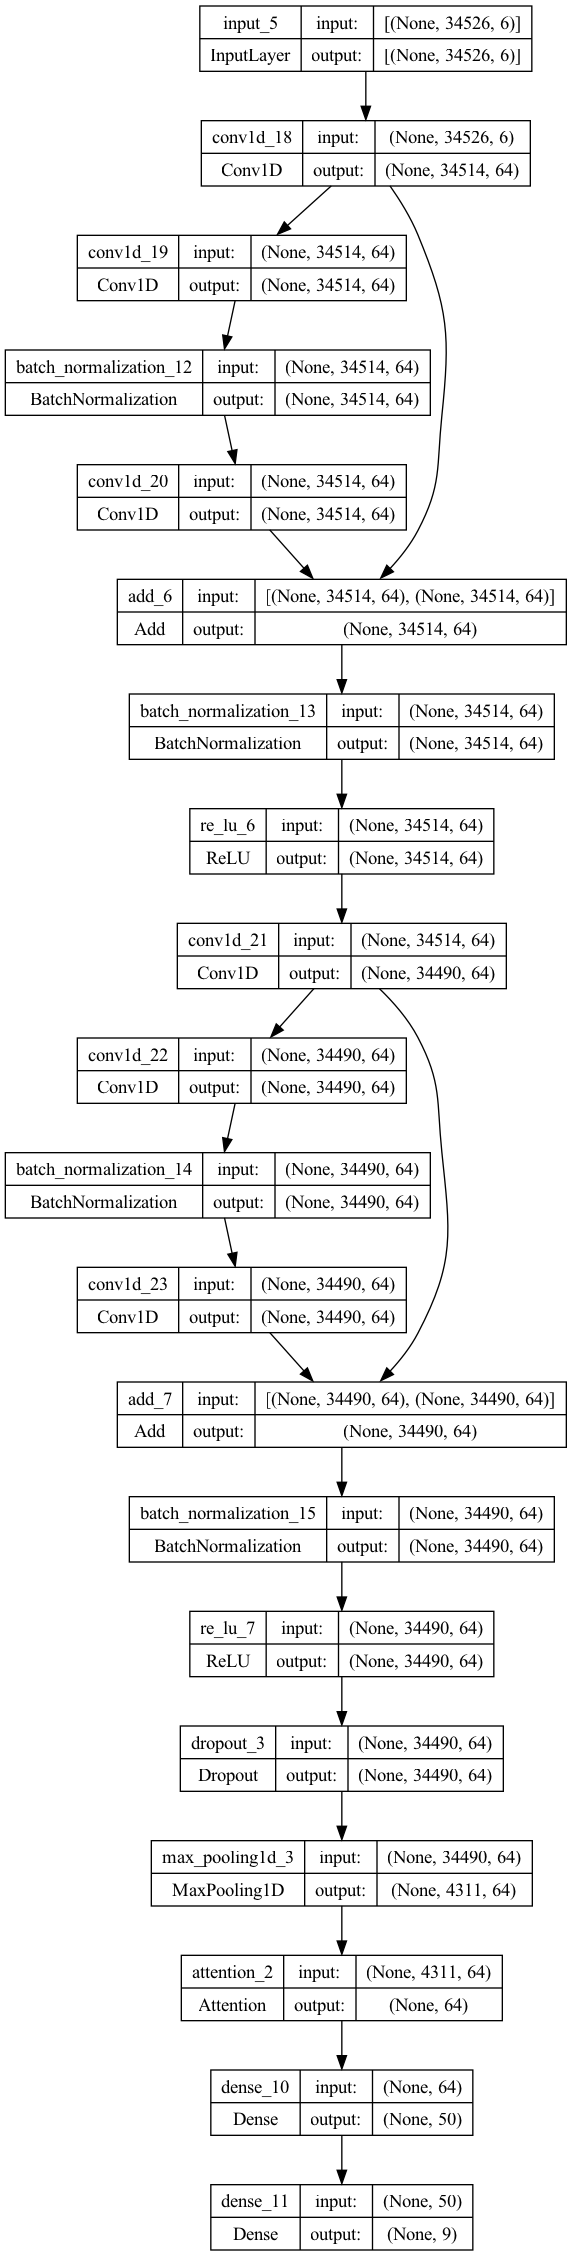

In [16]:
model = CNN(input_size=(max_seq_len, 6),
            params_model=params_model,
            metrics=[Pearson(return_dict=True)]
            )

model.print_model()
# model.summary() #if information about number of params needed

In [17]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 34526, 6)]           0         []                            
                                                                                                  
 conv1d_18 (Conv1D)          (None, 34514, 64)            2688      ['input_5[0][0]']             
                                                                                                  
 conv1d_19 (Conv1D)          (None, 34514, 64)            45120     ['conv1d_18[0][0]']           
                                                                                                  
 batch_normalization_12 (Ba  (None, 34514, 64)            256       ['conv1d_19[0][0]']           
 tchNormalization)                                                                          

In [18]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train)

Epoch 1/10
311/311 [==============================] - 1710s 5s/step - loss: 521.6555 - ERM: -1.3668e-04 - KDEL: -0.0086 - LMA: -0.0168 - MITO: 0.0209 - NES: 0.0030 - NIK: 0.0053 - NLS: -0.0042 - NUCP: 0.0148 - OMM: -0.0076 - val_loss: 183.4877 - val_ERM: 0.0000e+00 - val_KDEL: 0.0000e+00 - val_LMA: 0.0000e+00 - val_MITO: 8.3056e-27 - val_NES: -6.4939e-24 - val_NIK: 0.0000e+00 - val_NLS: 0.0000e+00 - val_NUCP: 0.1946 - val_OMM: 0.4401
Epoch 2/10
311/311 [==============================] - 1762s 6s/step - loss: 73.7414 - ERM: 0.0177 - KDEL: 0.0020 - LMA: 0.0033 - MITO: 0.0194 - NES: -0.0070 - NIK: 0.0110 - NLS: 0.0191 - NUCP: -0.0076 - OMM: -0.0184 - val_loss: 106.3891 - val_ERM: 0.0092 - val_KDEL: 2.5232e-20 - val_LMA: 1.0791e-10 - val_MITO: -0.0096 - val_NES: -1.5971e-05 - val_NIK: -5.1605e-20 - val_NLS: -1.6109e-22 - val_NUCP: -0.0628 - val_OMM: -0.1336
Epoch 3/10
311/311 [==============================] - 1618s 5s/step - loss: 64.8594 - ERM: -0.0085 - KDEL: -0.0106 - LMA: -0.0012 - MI

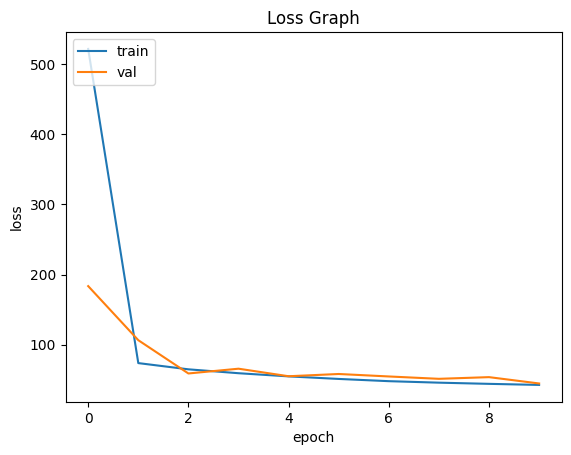

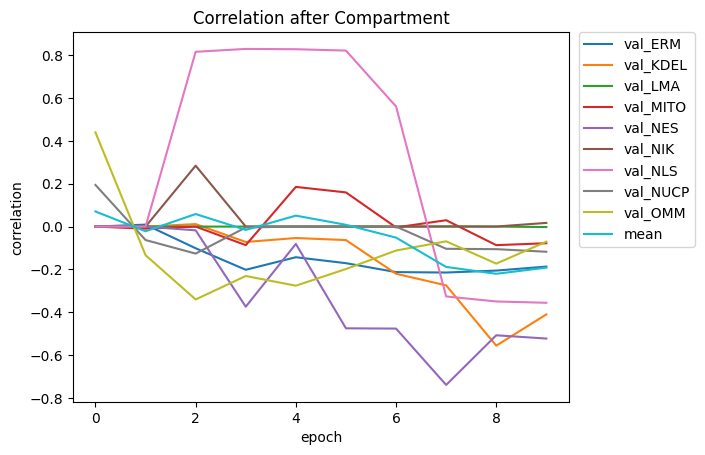

In [19]:
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

multiplot_pearson(history.history)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

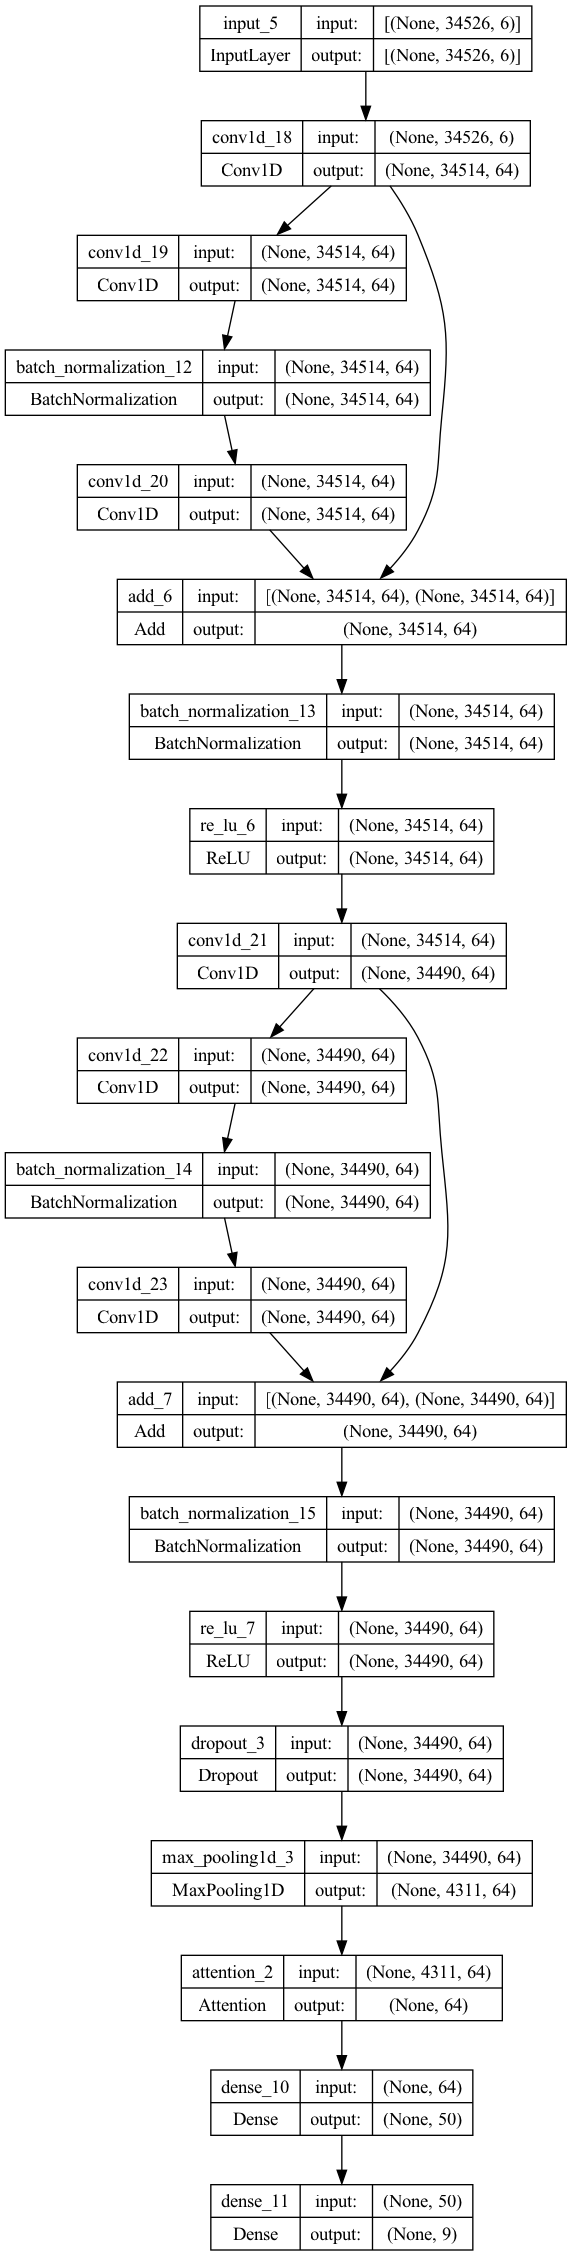

In [20]:
model.print_model(model_architecture_path)
#model.save_model(model_output_path)